# Build a Manual Neural Network

In this section we will build out a neural network minics the TensorFlow API. This will greatly help your understanding when working with the real TensorFlow!

In [6]:
class SimpleClass():
    def __init__(self):
        print("hello world!")
    
    def yell(self):
        print("I'M DOG")

In [9]:
x = SimpleClass()

hello world!


In [14]:
class ExtendedClass(SimpleClass): # Inherits from SimpleClass
    def __init__(self):
        super().__init__() # Grab derived class
        print("EXTEND!")

In [15]:
y = ExtendedClass()

hello world!
EXTEND!


## Operation class

In [149]:
import numpy as np

class Operation():
    '''
    An Operation is a node in a "Graph". TensorFlow will also use this concept of a Graph.

    This Operation class wil be inherited by other classes that actually compute the specific operation, such as adding or multiplication.
    '''
    def __init__(self, input_nodes=[]):
        '''
        Initialize an Operation
        '''
        self.input_nodes = input_nodes # List of input nodes
        self.output_nodes = [] # List of nodes consuming this node's output

        # For every node in the input, we append this operation (self) to the
        # list of the consumers of the input nodes
        for node in input_nodes:
            node.output_nodes.append(self)

        # There will be a global default graph (TF works whi way)
        # We will then append this particular operation
        # Append this operation to the list of operations in the curently active default graph
        _default_graph.operations.append(self)

    def compute(self):
        '''
        This is a placeholder function. It will be overwritten by the actual specific operation
        that inherits from this class.
        '''
        pass

class Add(Operation):
    def __init__(self, x, y):
         
        super().__init__([x, y])

    def compute(self, x_var, y_var):
         
        self.inputs = [x_var, y_var]
        return x_var + y_var

class Multiply(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):
         
        self.inputs = [a_var, b_var]
        return a_var * b_var

class MatMul(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
         
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat)

In [150]:
class Placeholder():
    """
    A placeholder is a node that needs to be provided a value for computing the output in the Graph.
    """
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

class Variable():
    """
    This variable is a changeable parameter of the Graph.
    """
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
         
        _default_graph.variables.append(self)

class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        """
        Sets this Graph instance as the Global Default Graph
        """
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [151]:
g = Graph()
g.set_as_default()
A = Variable(10)
b = Variable(2)
x = Placeholder()

In [152]:
y = Multiply(A, x)
z = Add(y, b)

## Traversing Operation Nodes

In [153]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [154]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output

In [155]:
session = Session()
results = session.run(operation=z, feed_dict={x:10})
results

102

In [156]:
g = Graph()
g.set_as_default()
A = Variable([[10, 30], [39, 24]])
b = Variable([1, 2])

x = Placeholder()
y = MatMul(A, x)

z = Add(y, b)

In [157]:
session = Session()
session.run(operation=z, feed_dict={x:10})

array([[101, 302],
       [391, 242]])

## Activation functions

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [160]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

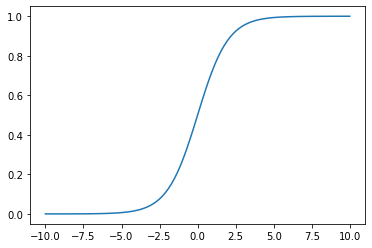

In [161]:
plt.plot(sample_z, sample_a)

In [170]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])

    def compute(self, z):
        return 1/(1 + np.exp(-z))

In [171]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=54)
data

(array([[-7.29030698,  0.89024309],
        [-6.23385974,  2.51245556],
        [-2.13678539, -3.18590044],
        [-2.19372718, -3.20881509],
        [-5.75792742,  1.20271907],
        [-6.20662974,  0.47626167],
        [-7.20273216,  0.38530803],
        [-6.48829871, -0.11186216],
        [-0.95455454, -1.58281197],
        [-5.60376567,  1.28950654],
        [-6.64328582,  0.0922546 ],
        [-7.07184237, -0.58837282],
        [-0.9717782 , -3.62990083],
        [-0.9701922 , -2.00182251],
        [-6.99119721, -0.3376277 ],
        [-2.75317518, -3.55476089],
        [-1.97039472, -3.09640383],
        [-1.71903075, -1.39401259],
        [-2.00240992, -4.36899237],
        [-1.69071586, -1.58019708],
        [-4.73854522,  1.72516572],
        [-5.16721977, -1.18436727],
        [-1.01331309, -3.41267112],
        [-5.44930758, -0.14006887],
        [-7.62649575,  1.68081825],
        [-0.98657843, -2.36427764],
        [-5.66103281, -0.61108816],
        [-6.95244756, -0.030

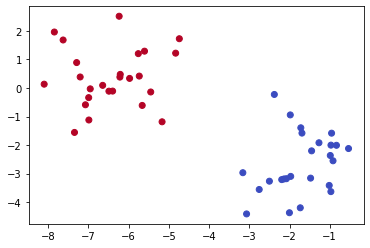

In [172]:
features = data[0]
labels = data[1]
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

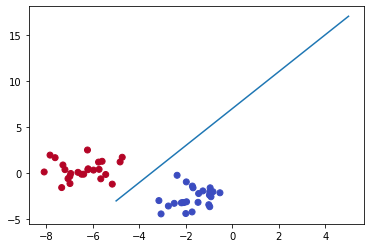

In [173]:
x = np.linspace(-5, 5, 10)
y = x*2 + 7
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x, y)

y = mx + B

y = 2 * x + 4

both y and x are features!

f1 = 2 * f2 + 4

f1 + f2 + 2 = 0

FeatureMatrix[1, 1] + 2 = 0

In [174]:
np.array([1, 1]).dot(np.array([[-6], [3]])) + 7

array([4])

In [175]:
np.array([1, 1]).dot(np.array([[-1], [-3]])) + 7

array([3])

In [176]:
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1, 1])
b = Variable(-5)
z = Add(MatMul(w, x), b)
a = Sigmoid(z)

In [183]:
session = Session()
session.run(operation=a, feed_dict={x:[1,2]})

0.11920292202211755

In [178]:
session.run(operation=a, feed_dict={x:[-2,-4]})

1.670142184809518e-05